In [1]:
import scBalance as sb
import scBalance.scbalance_IO as ss
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
adata = sc.read_10x_mtx(
    'C:\\Users\\Lenovo\\Documents\\Python Scripts\\filtered_gene_bc_matrices\\hg19',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)            

In [3]:
adata.var_names_make_unique()  

In [4]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

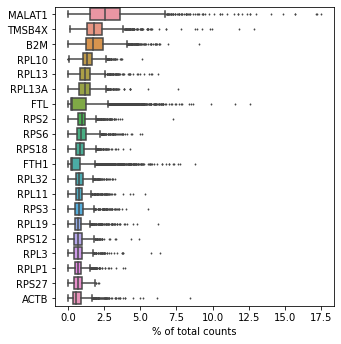

In [5]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [6]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [7]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

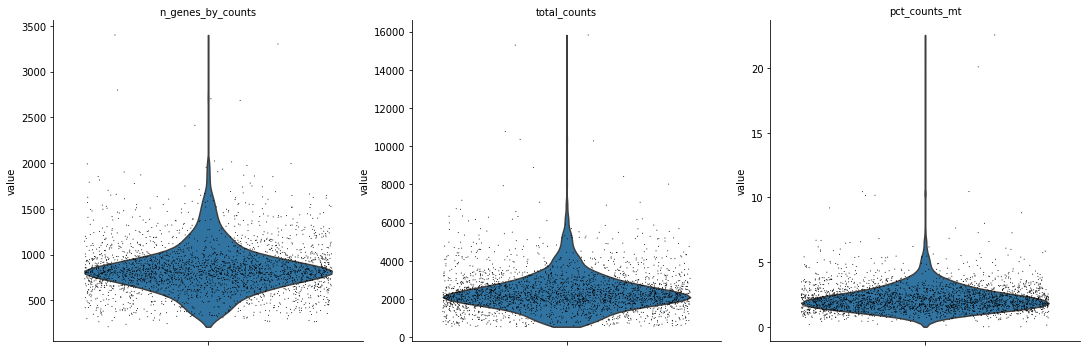

In [8]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

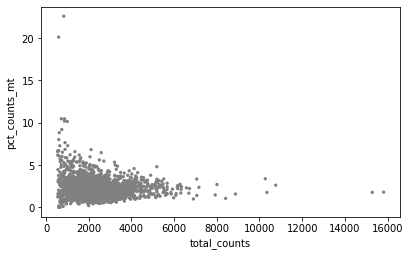

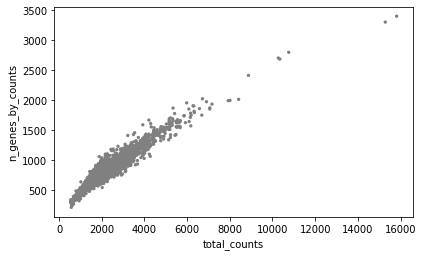

In [9]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [10]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :]

In [11]:
sc.pp.normalize_total(adata, target_sum=1e4)

D:\anaconda\envs\pytorch\lib\site-packages\scanpy\preprocessing\_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [12]:
sc.pp.log1p(adata)

In [13]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

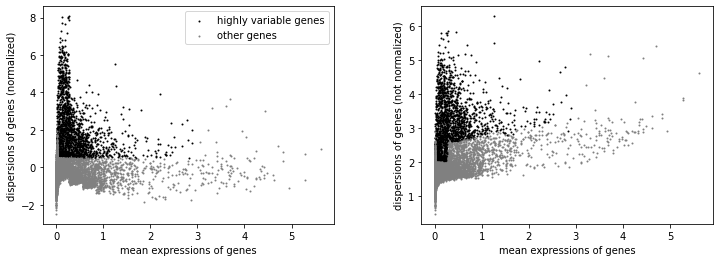

In [14]:
sc.pl.highly_variable_genes(adata)

In [15]:
adata = adata[:, adata.var.highly_variable]

In [16]:
sc.tl.pca(adata, svd_solver='arpack')

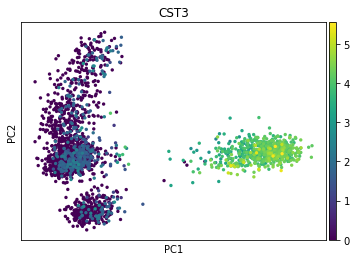

In [17]:
sc.pl.pca(adata, color='CST3')

In [18]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [19]:
sc.tl.umap(adata)

In [20]:
sc.tl.leiden(adata)

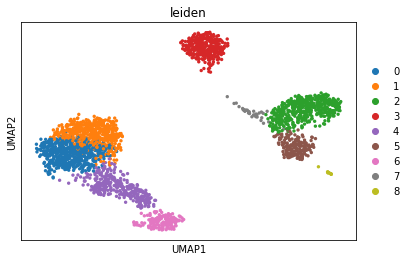

In [21]:
sc.pl.umap(adata, color=['leiden'])

In [22]:
train_adata = sc.read_csv("C:\\Users\\Lenovo\\Documents\\Python Scripts\\Inter-dataset\\PbmcBench\\10Xv2\\10Xv2_pbmc1.csv")
train_label = pd.read_csv("C:\\Users\\Lenovo\\Documents\\Python Scripts\\Inter-dataset\\PbmcBench\\10Xv2\\10Xv2_pbmc1Labels.csv")

In [23]:
test, reference, ref_label = ss.Scanpy_Obj_IO(test_obj=adata, ref_obj=train_adata, label_obj=train_label, scale = False)

In [24]:
pred_label = sb.scBalance(test, reference, ref_label, 'gpu')

--------Start annotating----------
Computational unit be used is: cuda
100%[====================->]40.19s
--------Annotation Finished----------


In [25]:
adata.obs['Label'] = pred_label

... storing 'Label' as categorical


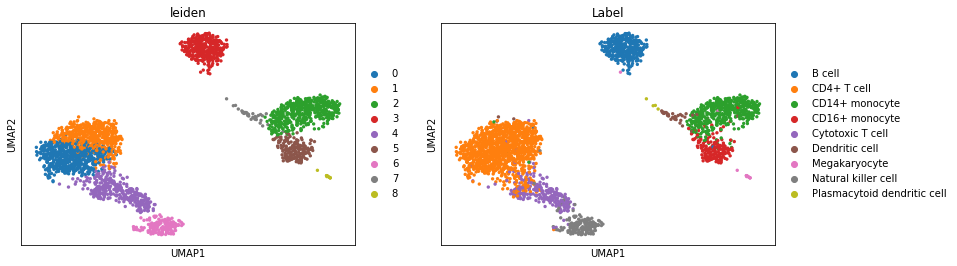

In [26]:
sc.pl.umap(adata, color=['leiden','Label'])